<a href="https://colab.research.google.com/github/githubtaniya924/Data-Analysis-Internship/blob/main/TwoSample_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Vs. Binary

In [ ]:
import pandas as pd
data = pd.read_csv('StudentStatistics.csv', sep=';')

In [ ]:
#Fisher's exact test is used to get the pvalue.
#To check how much is the assiociation i.e the effect we use the odds ratio

In [ ]:
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
data['Gen_Gender'].value_counts()

,count
Gen_Gender,
Male,34
Female,12


In [ ]:
data['Gen_SecSchool'].value_counts()

,count
Gen_SecSchool,
The Netherlands,24
Asia,7
Africa,5
Othern Western Europe,3
South America,1
North America,1
Eastern Europe,1


In [ ]:
#In order to make a Binary variable which has only two values here, Others, The Netherlands
data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'

In [ ]:
data['Gen_SecSchool'].value_counts()

,count
Gen_SecSchool,
Others,31
The Netherlands,24


In [ ]:
#step1 - get the descriptive statistics from the data
#Use crosstab
mycrosstab = pd.crosstab(data['Gen_Gender'],data['Gen_SecSchool'])

In [ ]:
mycrosstab

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


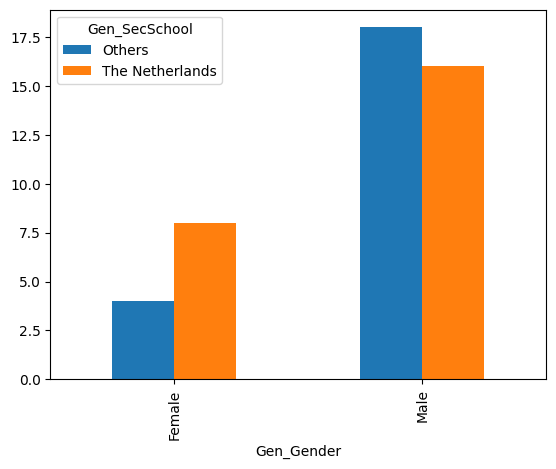

In [ ]:
#step 2 - Making a plot(cluster/joint)
import matplotlib.pyplot as plt
mycrosstab.plot(kind='bar')
plt.show()

In [ ]:
#step 3 - Apply fisher exact test

#h0 - There is no influence/association on Gen_SecSchool
#ha - There is influence/association on Gen_SecSchool

import scipy
from scipy.stats import fisher_exact
fisher_exact(mycrosstab)

SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [ ]:
#The pvalue < 0.05
#no evidence reject's the null hypothesis
#So we cannot measure the effect size.

#However here is an example of how to measure the effect
a = mycrosstab.iloc[0,0]
b = mycrosstab.iloc[0,1]
c = mycrosstab.iloc[1,0]
d = mycrosstab.iloc[0,0]

OR = (a/c)/ (b/d)

if OR <1.49:
  print('negligible')
elif OR< 3.45:
  print('Small')
elif OR < 9:
  print('medium')
else:
  print('large')

negligible


In [ ]:
OR

0.1111111111111111

In [ ]:
# Fisher exact test does not find an influence of gender on the location of the secondary.
# School (pvalue = 3.2) and the futher odds ratio effect size was negligible OR=0.111

Binary Vs. Ordinal Hypothesis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

In [ ]:
import stikpetP as sp


In [ ]:
#apply crosstab

pd.crosstab(data['Gen_Gender'],data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Gen_Gender,,,,,
Female,8,1,0,0,2
Male,15,1,2,14,2


In [ ]:
#Extracting the index values from min_nract
data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

In [ ]:
#coding the index values of ordinal variable

In [ ]:
coding =({'Far too little':0,  'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4})

/usr/local/lib/python3.10/dist-packages/stikpetP/visualisations/vis_bar_stacked_multiple.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordField = ordField.replace(levels)


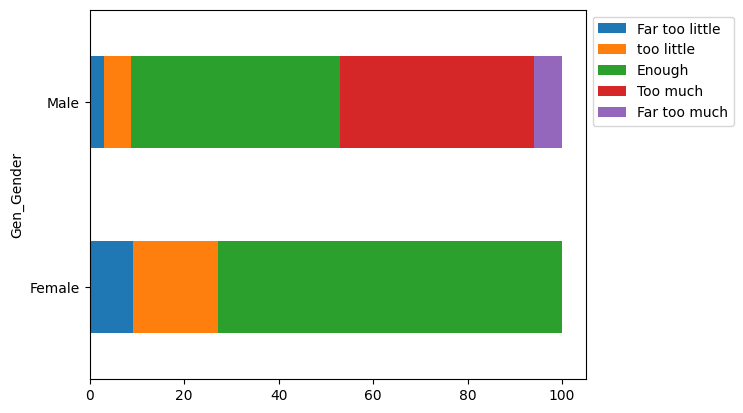

In [ ]:
sp.vi_bar_stacked_multiple(data['Gen_Gender'],data['Mix_NrAct'],coding)

In [ ]:
myOrd = data['Mix_NrAct'].replace(coding)

In [ ]:
mybin1 = data['Gen_Gender'] == 'Male'
mybin2 = data['Gen_Gender'] == 'Female'

In [ ]:
myord1 = myOrd['mybin1'].dropna()
myord2 = myOrd['mybin2'].dropna()

Binary Vs. Scale

In [ ]:
# H0 - No assosication between gender and marks in an exam.
# Ha - Association between gender and marks in an exam.

In [ ]:
#We need to understand what is the average score for each gender
data.groupby('Gen_Gender')['Over_Grade'].mean()

,Over_Grade
Gen_Gender,
Female,53.727273
Male,59.766667


In [ ]:
data.groupby('Gen_Gender')['Over_Grade'].std()

,Over_Grade
Gen_Gender,
Female,26.382157
Male,19.383042


In [ ]:
malescores = data['Over_Grade'][data['Gen_Gender'] == 'Male'].dropna()
femalescores = data['Over_Grade'][data['Gen_Gender'] == 'Female'].dropna()

(array([1., 1., 2., 1., 0., 2., 3., 0., 1.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 9 artists>)

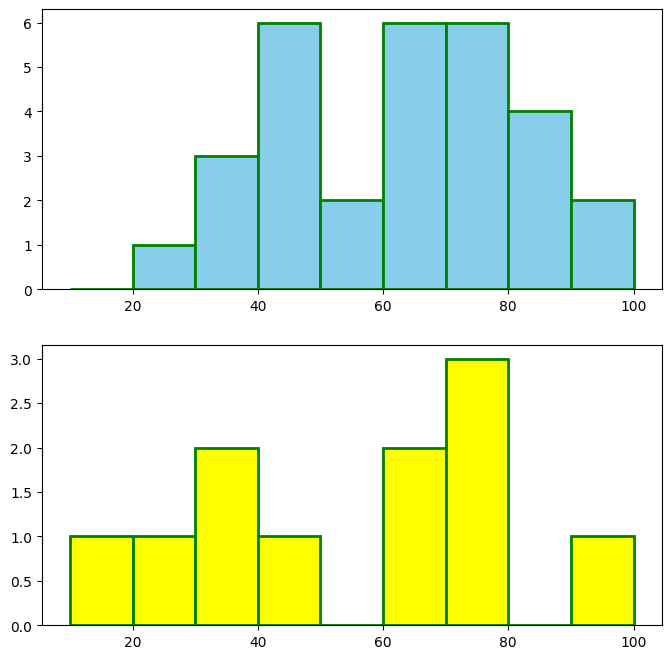

In [ ]:
#Visualisation
plt.figure(1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(malescores, color = 'skyblue', lw =2, edgecolor='green', bins = [10,20,30,40,50,60,70,80,90,100])

plt.subplot(2,1,2)
plt.hist(femalescores, color = 'yellow', lw =2, edgecolor='green', bins = [10,20,30,40,50,60,70,80,90,100])

In [ ]:
from scipy.stats import ttest_ind
#student t test
print(ttest_ind(malescores,femalescores))

#Welch t test
print(ttest_ind(malescores,femalescores,equal_var = False))

TtestResult(statistic=0.8007631996644367, pvalue=0.428120221815538, df=39.0)
TtestResult(statistic=0.6936894455945684, pvalue=0.4991001245520197, df=14.158919197596669)


In [ ]:
pvalue=0.428120221815538

In [ ]:
if pvalue < 0.05:
  print('H0 is rejected')
else:
  print('Ho is not rejected')

Ho is not rejected


In [ ]:
#Therefore,
# H0 - No assosication between gender and marks in an exam. is likely true.
#Here, we cannot measure the effect size.
#but lets see how effect size works and what is the formula.

In [ ]:
#effect size - cohen d_s

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as sp

In [ ]:
sp.es_hedges_g_is(data['Gen_Gender'],data['Over_Grade'])

,g,version
0,0.282253,Cohen ds (Hedges g (uncorrected)


In [ ]:
d_s = 0.282253

if d_s <0.01:
  print('negligible')
elif d_s < 0.2:
  print('very small')
elif d_s <0.5:
  print('small')
elif d_s < 0.8:
  print('medium')
elif d_s < 1.2:
  print('large')
elif d_s < 2:
  print('very large')
else:
  print('huge')

small


In [ ]:
''' Welch t test applied on the data did not find evidence to reject the null hypothesis that their is an
evidence between gender and marks obtained (p=0.49)

If the pvalue < 0.05
we woeld say that,
pvalue < 0.05 thus we can reject the null hypothesis
Futher the cohen d effect size suggest the strength of association to be small(d=0.28)
'''

Nominal Vs. Nominal

Pearsons chi square test of independence - pvalue
cramer v - effect size

note: For nominal Vs Binary we use the same formulas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1 = pd.read_csv('GSS2012a.csv')

In [ ]:
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

In [ ]:
# Apply crosstab
dataviz = pd.crosstab(data1['mar1'],data1['life'])

In [ ]:
dataviz

life,DULL,EXCITING,ROUTINE
mar1,,,
DIVORCED,10,111,79
MARRIED,20,354,269
NEVER MARRIED,14,134,115
SEPARATED,3,22,32
WIDOWED,14,39,55


<Axes: xlabel='mar1'>

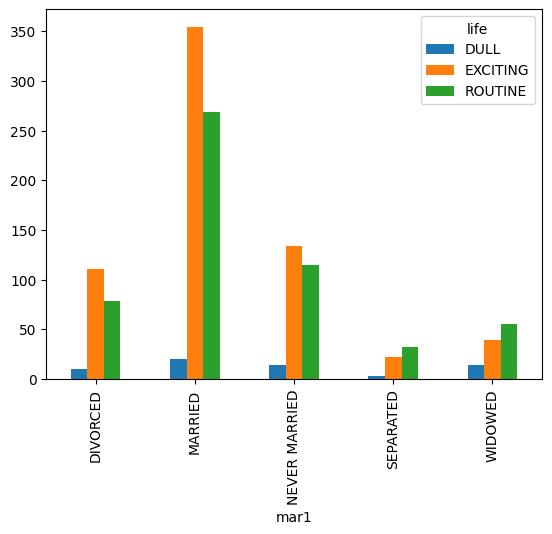

In [ ]:
#data visulaization
dataviz.plot(kind='bar')

In [ ]:
#Hypothesis testing
# H0 - No association/influence between marriage status and life
# Ha - association/influence between marriage status and life

import scipy
from scipy.stats import chi2_contingency

chi2_contingency(dataviz)

Chi2ContingencyResult(statistic=32.535800204049536, pvalue=7.464877390427598e-05, dof=8, expected_freq=array([[  9.59874115, 103.8552321 ,  86.54602675],
       [ 30.85995279, 333.8945712 , 278.245476  ],
       [ 12.62234461, 136.56963021, 113.80802518],
       [  2.73564123,  29.59874115,  24.66561762],
       [  5.18332022,  56.08182533,  46.73485445]]))

In [ ]:
pvalue=7.464877390427598e-05

if pvalue < 0.05:
  print('H0 is rejected')
else:
  print('H0 is not rejected')

H0 is rejected


In [ ]:
#The pvalue< 0.05
#so, we can measure the effect size
chi2table = sp.ts_pearson_ind(data1['mar1'],data1['life'])
chi2table

,n,n rows,n col.,statistic,df,p-value,min. exp.,prop. exp. below 5,test
0,1271.0,5,3,32.5358,8,0.000075,2.735641,0.066667,Pearson chi-square test of independence


In [ ]:
n = chi2table['n'][0]
nrows = chi2table['n rows'][0]
ncols = chi2table['n col.'][0]
stat = chi2table['statistic'][0]

sp.es_cramer_v_ind(stat, n, nrows, ncols)

0.11313395589484188

In [ ]:
v=0.11313395589484188

In [ ]:
#df = degree of freedom

df= min(nrows,ncols)-1
df

2

Nominal Vs. Ordinal

Kruskal wallis h test - pvalue
epsilon square - effect size

In [ ]:
#Apply crosstab
pd.crosstab(data['Location'],data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Location,,,,,
Diemen,8,1,2,6,0
Haarlem,12,1,0,4,2
Rotterdam,7,0,0,5,3


In [ ]:
data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

In [ ]:
code = ({
    'Far too little':0,
    'too little':1,
    'Enough':2,
    'Too much':3,
    'Far too much':4

})

In [ ]:
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

/usr/local/lib/python3.10/dist-packages/stikpetP/visualisations/vis_bar_stacked_multiple.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordField = ordField.replace(levels)


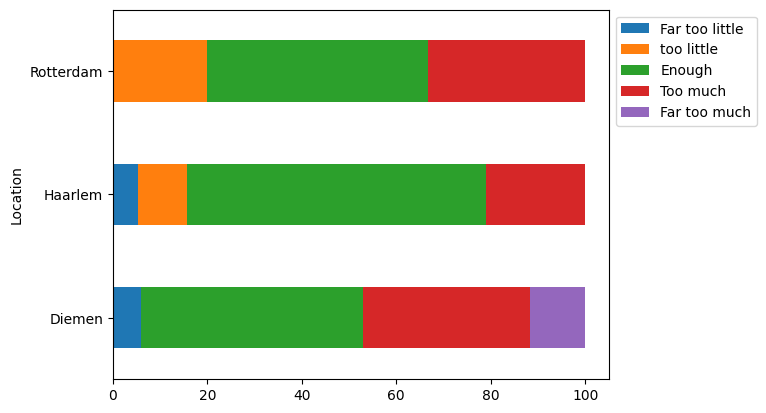

In [ ]:
import stikpetP as sp

sp.vi_bar_stacked_multiple(data['Location'],data['Mix_NrAct'],code)

In [ ]:
from scipy.stats import kruskal

rotterdamscores = data['Mix_NrAct'][data['Location'] == 'Rotterdam'].dropna()
diemenscores = data['Mix_NrAct'][data['Location'] == 'Diemen'].dropna()
haarlemscores = data['Mix_NrAct'][data['Location'] == 'Haarlem'].dropna()

In [ ]:
rotterdamscores = rotterdamscores.replace(code)
diemenscores = diemenscores.replace(code)
haarlemscores = haarlemscores.replace(code)

In [ ]:
kruskal(rotterdamscores,diemenscores,haarlemscores)

KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [ ]:
pvalue=0.1887117641109804

In [ ]:
if pvalue < 0.05:
  print('H0 can be rejected')
else:
  print('H0 cannot be rejected')

In [ ]:
#Lets understand the effect size - Epsilon square
#Epsilon square tells us how strong is the association or the strength
# x - nominal data - place of school
# y - ordinal data - feeling of number of activities

#In the above example X has no influence on Y


In [ ]:
#test statistics
h = 3.335068971240797

#number of cases
n = pd.crosstab(data['Location'],data['Mix_NrAct']).sum().sum()

print(h,n)

3.335068971240797 51


In [ ]:
esq = h * ((n+1)/(n**2 -1))
esq

0.06670137942481594

In [ ]:
if esq < 0.01:
  print('negligible')
elif esq < 0.04:
  print('weak')
elif esq < 0.16:
  print('moderate')
elif esq < 0.36:
  print('relatively strong')
elif esq <0.64:
  print('strong')
else:
  print('Strong')

In [ ]:
'''
The Kurskal wallis h test did not find the an assosiation/infiuence/impact of place pf school and feeling of activities.

Futher the Epsilon square effect test was moderate.
'''

Nominal Vs. Scale

We use Welch test
welch test gives us the pvalue and the eta square i.e the effect size.
Here, effect size is from 0-1
To use the Welch method we have to install the pingouin
steps: 1) Read the table
       2) Extract the nominal column and scale column
       3) Group by the nominal column and find the mean,median,sd and min of the scale variable represented in the table.
       4)
       5) Use subplot to plot the scores for the location through histogram
       6) intall the !pip pingouin to use the welch test
       7) Check whether the H0 is rejected or not
       8) The welch test gives eta square i.e the effect size
       9) We give the strength of influence of the effect size.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('StudentStatistics.csv', sep=';')

In [ ]:
data1['Over_Grade']

In [ ]:
data1['Location']

In [ ]:
data1.groupby('Location')['Over_Grade'].agg(['mean','median','std','min'])

,mean,median,std,min
Location,,,,
Diemen,74.625000,70.0,14.536735,40.0
Haarlem,51.947368,45.0,19.432143,20.0
Rotterdam,47.153846,50.0,26.807481,10.0


data['Over_Grade']: This accesses the Over_Grade column from the data DataFrame.
data['Location'] == 'rotterdam': This condition checks which rows in the Location column have the value 'rotterdam'. It returns a Boolean series (True for rows where 'Location' is 'rotterdam', False otherwise).
data['Over_Grade'][data['Location'] == 'rotterdam']: This applies the Boolean series to filter the Over_Grade column to only include rows where 'Location' is 'rotterdam'.
So, rotterdamscore will contain the values from the Over_Grade column for rows where the location is 'rotterdam'

In [ ]:
rotterdamscore1 = data1['Over_Grade'][data1['Location'] == 'Rotterdam'].dropna()
diemenscore1 = data1['Over_Grade'][data1['Location'] == 'Diemen'].dropna()
haarlemscore1 = data1['Over_Grade'][data1['Location'] == 'Haarlem'].dropna()

In [ ]:
rotterdamscore1

,Over_Grade
0,20.0
3,15.0
6,30.0
9,60.0
12,25.0
15,65.0
18,98.0
21,60.0
24,50.0
33,35.0


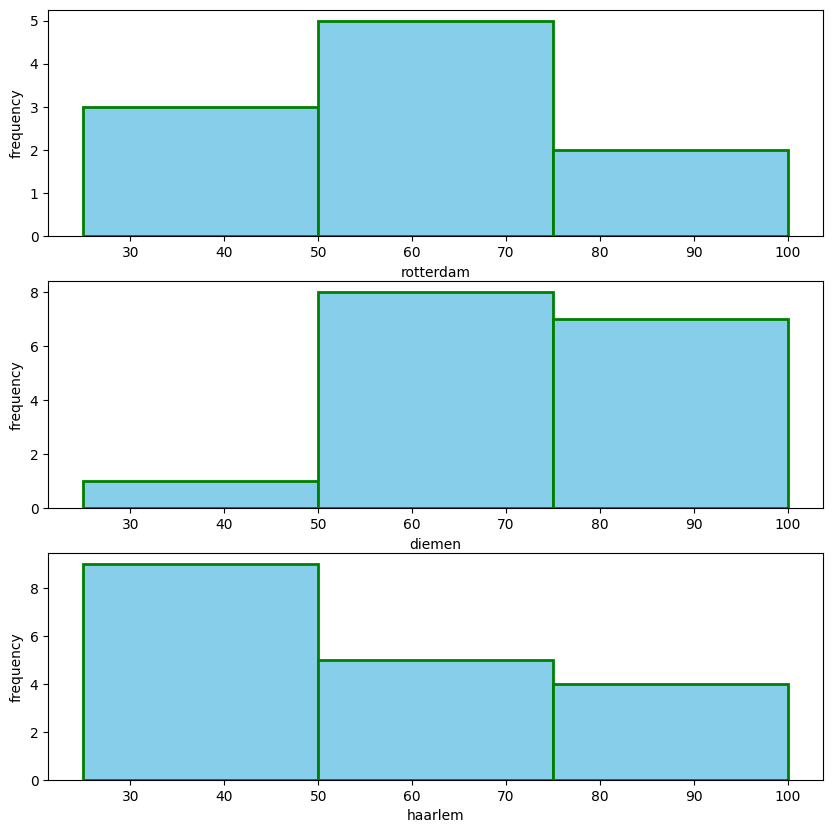

In [ ]:
# Visual representation of the scores in each location

plt.figure(1,figsize = (10,10))

plt.subplot(3,1,1)
plt.hist(rotterdamscore1, color='skyblue', edgecolor='green', lw=2, bins=[25,50,75,100])
plt.xlabel('rotterdam')
plt.ylabel('frequency')

plt.subplot(3,1,2)
plt.hist(diemenscore1, color='skyblue', edgecolor='green', lw=2, bins=[25,50,75,100])
plt.xlabel('diemen')
plt.ylabel('frequency')

plt.subplot(3,1,3)
plt.hist(haarlemscore1, color='skyblue', edgecolor='green', lw=2, bins=[25,50,75,100])
plt.xlabel('haarlem')
plt.ylabel('frequency')

plt.show()


In [ ]:
#Welch ANOVA
# Analysis of Variance

#H0 - Location has no influence on the marks
#Ha-  Location has inflience on the marks

!pip install pingouin
import pingouin as pin

pin.welch_anova(dv = 'Over_Grade',between ='Location', data=data1)

In [ ]:
pvalue = 0.000536

if pvalue < 0.05:
  print('H0 is rejected')
else:
  print('H0 is not rejected')

H0 is rejected


In [ ]:
eta_sqr = 0.263336

if eta_sqr < 0.01:
  print('negligible')
elif eta_sqr <0.06:
  print('small')
elif eta_sqr < 0.14:
  print('medium')
else:
  print('large')

large


In [ ]:
'''
Welch ANOVA has found an influence of location on the marks

and futher the strength of the influence is large.
'''

Ordinal Vs. ordinal<br>
We need to find whether one ordinal variable influences another ordinal variable.
steps : 1) Read the data
2) Extract the two ordinal variable.
3) create a cross table.
4) data visualistion through the bar chart.
5) To find the pvalue use goodman Kruskal Gamma here we need to take an in-built function.
6) The effect size is known as the gamma effect size
7) Report

In [ ]:
data2 = pd.read_csv('StudentStatistics.csv', sep=';')

In [ ]:
data2.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
#extracting two ordinal columns
data2['Teach_LinkTheory'].value_counts()

,count
Teach_LinkTheory,
Neither disagree nor agree,16
Disagree,12
Fully Disagree,11
Agree,8
Fully agree,7


In [ ]:
data2['Teach_Motivate'].value_counts()

,count
Teach_Motivate,
Fully Disagree,20
Neither disagree nor agree,12
Disagree,9
Agree,7
Fully agree,6


In [ ]:
#Create croostab
dataviz1 = pd.crosstab(data2['Teach_Motivate'],data2['Teach_LinkTheory'])

In [ ]:
dataviz1

Teach_LinkTheory,Agree,Disagree,Fully Disagree,Fully agree,Neither disagree nor agree
Teach_Motivate,,,,,
Agree,4,0,0,0,3
Disagree,1,5,1,0,2
Fully Disagree,0,7,10,0,3
Fully agree,1,0,0,5,0
Neither disagree nor agree,2,0,0,2,8


<Axes: xlabel='Teach_Motivate'>

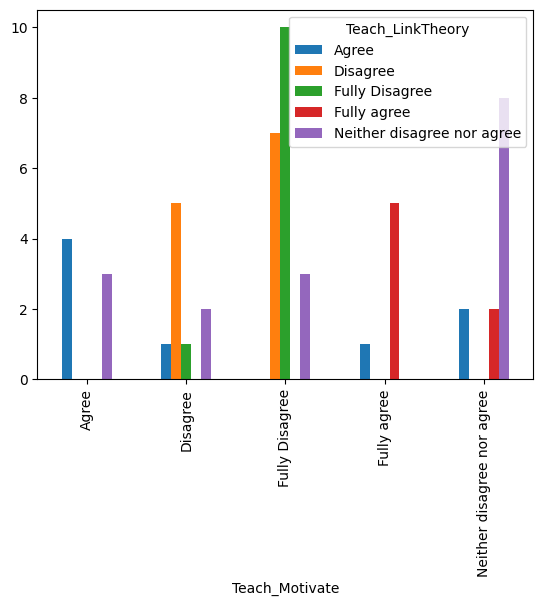

In [ ]:
# Data visualization
dataviz1.plot(kind='bar')

In [ ]:
#Goodman Kruskal Gamma Test

#H0 - No relation between Teach_Motivate and Teach_LinkTheory
#H1 - Relation between Teach_Motivate and Teach_LinkTheory

#effect size - gamma

In [ ]:
#Goodman Kruskal Gamma

#H0 -> There is no influence of teacher_motivates on teacher link theory
#ha -> There is influence of teacher_motivates on teacher link theory

#effect size -> Gamma effect size

from scipy.stats import norm

def goodmanKruskalgamma(data, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
    myCrosstable = pd.crosstab(data[ordinal1], data[ordinal2])

    myCrosstable = myCrosstable.reindex(orderLabels1)

    if orderLabels2 == None:
        myCrosstable = myCrosstable[orderLabels1]
    else:
        myCrosstable = myCrosstable[orderLabels2]

    nRows = myCrosstable.shape[0]
    nCols = myCrosstable.shape[1]


    C = [[0 for x in range(nCols)] for y in range(nRows)]

    # top left part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j-1
            if h>=0 and k>=0:
                for p in range(h+1):
                    for q in range(k+1):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    # bottom right part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j+1
            if h<nRows and k<nCols:
                for p in range(h, nRows):
                    for q in range(k, nCols):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    D = [[0 for x in range(nCols)] for y in range(nRows)]

    # bottom left part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j-1
            if h<nRows and k>=0:
                for p in range(h, nRows):
                    for q in range(k+1):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    # top right part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j+1
            if h>=0 and k<nCols:
                for p in range(h+1):
                    for q in range(k, nCols):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    P = 0
    Q = 0
    for i in range(nRows):
        for j in range(nCols):
            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]

    GKgamma = (P - Q) / (P + Q)

    if abs(GKgamma) < .10:
        qual = 'Negligible'
    elif abs(GKgamma) < .20:
        qual = 'Weak'
    elif abs(GKgamma) < .40:
        qual = 'Moderate'
    elif abs(GKgamma) < .60:
        qual = 'Relatively strong'
    elif abs(GKgamma) < .80:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    n = myCrosstable.sum().sum()

    Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma*2)))*0.5

    forASE0 = 0
    forASE1 = 0
    for i in range(nRows):
        for j in range(nCols):
            forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
            forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2

    ASE0 = 4 * (forASE0)*0.5 / (P + Q)*2
    ASE1 = 2 * (forASE1 - (P - Q)*2 / n)*0.5 / (P + Q)
    Z2 = GKgamma / ASE0
    Z3 = GKgamma / ASE1

    p1 = norm.sf(Z1)
    p2 = norm.sf(Z2)
    p3 = norm.sf(Z3)

    zvalues = [Z1] + [Z2] + [Z3]
    pvalues = [p1] + [p2] + [p3]

    return (GKgamma,qual), zvalues, pvalues

In [ ]:
data2['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
data2['Teach_LinkTheory'].unique()


array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', 'Agree', nan], dtype=object)

In [ ]:
ordival1 = ['Fully Disagree', 'Disagree',
       'Neither disagree nor agree', 'Agree','Fully agree']

In [ ]:
ordival2 = ['Fully Disagree', 'Disagree',
       'Neither disagree nor agree', 'Agree','Fully agree']

In [ ]:
goodmanKruskalgamma(data2, 'Teach_Motivate', 'Teach_LinkTheory', ordival1, ordival2)

((0.8768577494692145, 'Very strong'),
 [-20.29452269170579, 2.896152287356112e-07, 0.030405198140950218],
 [1.0, 0.4999998844602402, 0.48787194962844294])

In [ ]:
0.8768577494692145, 'Very strong'

Ordinal Vs. Scale

In [ ]:
#Extrating one ordinal column and one scale column
#1. Teach_Motivate - ordinal data
#2. Over_Grade - Scale

In [ ]:
#Group by Teach_Motivate table and find the aggreates of the over_grade variable
data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean','median','std','min'])

,mean,median,std,min
Teach_Motivate,,,,
Agree,78.000000,75.0,12.179217,65.0
Disagree,52.777778,50.0,18.219343,20.0
Fully Disagree,36.812500,38.0,14.725120,10.0
Fully agree,84.600000,85.0,10.526158,70.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0


<Axes: xlabel='Over_Grade', ylabel='Count'>

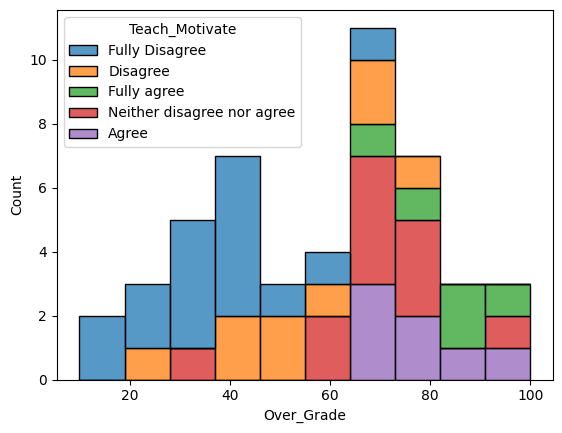

In [ ]:
#Visual representation of the scores

#1
import seaborn as sns

sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='stack') #muliple has other values like layer,dodge

<Axes: xlabel='Teach_Motivate', ylabel='Over_Grade'>

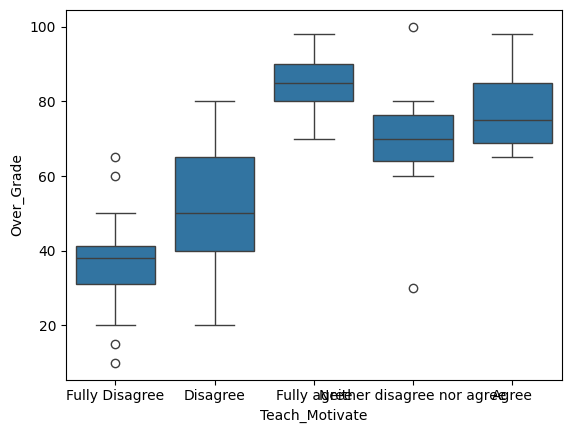

In [ ]:
sns.boxplot(x='Teach_Motivate',y='Over_Grade',data=data)

In [ ]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
coding = ({
           'Fully Disagree':0,
           'Disagree':1,
           'Neither disagree nor agree':2,
           'Agree':3,
           'Fully agree':4,

})

In [ ]:
mydata = data[['Teach_Motivate','Over_Grade']]

In [ ]:
mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)

In [ ]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


In [ ]:
statistic=0.7871998951252405
pvalue=3.236363793284169e-11

#pvalue<0.05
#We can reject the null hypothesis
#Therefore the result is significant

In [ ]:
rho = abs(statistic)
rho

0.7871998951252405

In [ ]:
if rho < 0.1:
  print('negligible')
elif rho < 0.2:
  print('weak')
elif rho < 0.4:
  print('moderate')
elif rho < 0.6:
  print('relatively strong')
elif rho < 0.8:
  print('strong')
else:
  print('Strong')

strong


In [ ]:
#The pvalue < 0.05 Therefore we can reject the null hypothesis
#Therefore there is influence of Teac_motivate on Grades
#The influence of Teach_Motivate and Grades is strong

In [ ]:
import scipy
from scipy.stats import spearmanr

spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

Scale Vs. Scale

In [ ]:
#Extract the two scale variable and get the tabular summary of the variables
data[['Gen_Age','Over_Grade']].describe()


,Gen_Age,Over_Grade
count,44.000000,48.000000
mean,24.454545,58.208333
std,15.144965,23.171845
min,18.000000,10.000000
25%,19.000000,40.000000
50%,21.000000,64.000000
75%,24.250000,75.000000
max,119.000000,100.000000


In [ ]:
#By analysing the graph it seems that the age has no influence on the grades. But let's see what the hypothesis test i.e, pearsonr test tells
import scipy
from scipy.stats import pearsonr

newdf = data[['Gen_Age','Over_Grade']].dropna()

pearsonr(newdf['Gen_Age'],newdf['Over_Grade'])


PearsonRResult(statistic=-0.06061251564426085, pvalue=0.7139570447292615)

In [ ]:
statistic=-0.06061251564426085
pvalue=0.7139570447292615

In [ ]:
#Let's find it for understanding the formula

rho = abs(statistic)
rho

0.06061251564426085

In [ ]:
if rho< 0.1:
    print('negligible')
elif rho < 0.2:
    print('weak')
elif rho < 0.4:
    print('Moderate')
elif rho < 0.6:
    print('Relatively Strong')
elif rho < 0.8:
    print('Strong')
else:
    print('Very Strong')

negligible


In [ ]:
#The pvalue is not less than 0.05 therefore we cannot reject the null hypothesis
#The influence of age on grade is negligible (0.06)

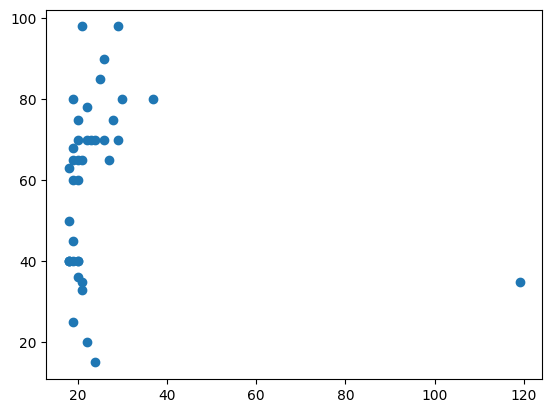

In [ ]:
#Visualiziting the data in scatter format
plt.scatter(data['Gen_Age'],data['Over_Grade'])